In [1]:
from classes import Word, Line, Item, BoundingBox

test_words = [
	Word("bullet", BoundingBox(0,10, 50, 30)),
	Word("test", BoundingBox(150, 10, 250, 30)),
	Word("abc", BoundingBox(255, 10, 300, 30)),
]

test_line1 = Line([Word('header', BoundingBox(0, 10, 100, 30))], fontweight="bold")
test_line2 = Line(test_words)

test_bullet = Word("-", BoundingBox(1, 2, 3, 4))

test_item = Item([test_line1, test_line2], test_bullet)

test_item.get_box().__dict__

{'x1': 0, 'y1': 10, 'x2': 300, 'y2': 30}

In [2]:
import json
from PIL import Image
from process_scans import get_text_detection
from classes import Word, Line, Item, BoundingBox

with open("sample_data/kicd-chem-p12_ocr.json") as f:
    page_data = json.load(f)
    
page_image = Image.open("sample_data/kicd-chem-p12.png")
page_image_boxes = Image.open("sample_data/kicd-chem-p12_boxes.png")

page_data.keys()

dict_keys(['text', 'pages'])

In [3]:
# from matplotlib import pyplot as plt
# import numpy as np

# # plt.hist([word.bounding_box.y1 for word in extract_word_list(page_data)], bins=1000)

# plt.rcParams["figure.figsize"] = (6, 18)

# import sklearn.cluster as cluster

# yvals = [word.bounding_box.center()[1] for word in extract_word_list(page_data)]

# colors = cluster.DBSCAN().fit_predict(np.array([yvals]).T)

# plt.scatter([word.bounding_box.center()[0] for word in extract_word_list(page_data)], [-word.bounding_box.center()[1] for word in extract_word_list(page_data)], c=colors, cmap="Set1")

# plt.show()


In [6]:
import cv2
from extraction_utils import extract_single_line_items_from_column, get_bullets_by_template

img_rgb = cv2.imread("sample_data/kicd-chem-p12.png")

bullets = get_bullets_by_template(img_rgb)

column_box = BoundingBox(10, 10, 250, 320)
items = extract_single_line_items_from_column(page_data, column_box=column_box, bullets=bullets)

for bullet in bullets:
    box = bullet.bounding_box
    if column_box is None or box in column_box:
        cv2.rectangle(img_rgb, (box.x1, box.y1), (box.x2, box.y2), (255,0,255), 2)

for item in items:
    box = item.get_box()
    cv2.rectangle(img_rgb, (box.x1, box.y1), (box.x2, box.y2), (0,0,255), 2)

if column_box:
    cv2.rectangle(img_rgb, (column_box.x1, column_box.y1), (column_box.x2, column_box.y2), (0,255,0), 2)
    
Image.fromarray(img_rgb)

[i.lines[0].words for i in items]

[[<Word: "21" @ (21, 16)/(33, 29)>,
  <Word: "." @ (33, 16)/(36, 29)>,
  <Word: "2" @ (38, 16)/(41, 29)>,
  <Word: "." @ (43, 16)/(46, 29)>,
  <Word: "4" @ (47, 16)/(50, 29)>,
  <Word: "Electrolysis" @ (65, 16)/(123, 29)>],
 [<Word: "•" @ (58, 31)/(77, 44)>,
  <Word: "The" @ (89, 32)/(105, 43)>,
  <Word: "role" @ (110, 32)/(126, 43)>,
  <Word: "of" @ (131, 32)/(141, 43)>,
  <Word: "water" @ (143, 32)/(170, 43)>,
  <Word: "in" @ (175, 32)/(181, 43)>],
 [<Word: "electrolysis" @ (89, 46)/(142, 58)>,
  <Word: "." @ (143, 46)/(145, 58)>],
 [<Word: "•" @ (58, 60)/(77, 73)>,
  <Word: "Preferential" @ (88, 60)/(146, 75)>,
  <Word: "discharge" @ (148, 61)/(193, 76)>,
  <Word: "in" @ (199, 62)/(203, 75)>],
 [<Word: "electrolysis" @ (89, 75)/(142, 87)>,
  <Word: "of" @ (146, 75)/(155, 87)>,
  <Word: "the" @ (159, 75)/(173, 87)>,
  <Word: "following" @ (179, 75)/(223, 87)>],
 [<Word: "solutions" @ (88, 90)/(130, 101)>,
  <Word: ":" @ (131, 90)/(133, 101)>],
 [<Word: "-" @ (81, 107)/(97, 114)>,
  <

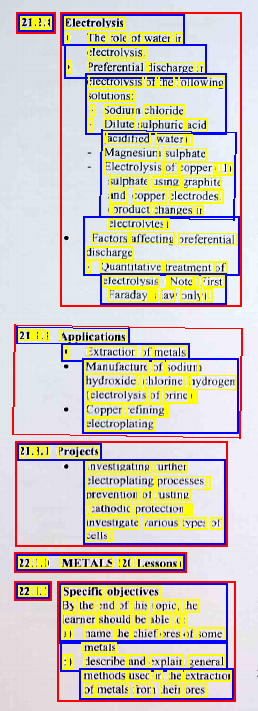

In [5]:
page_image_boxes